In [1]:
# instalar con lo que vamos a trabajar

%pip install ipython
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# importar todo lo necesario para trabajar el df

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import pylab as plt
import seaborn as sns


%matplotlib inline

In [3]:
# leer el df y crear una variable (df_shark)

df_shark= pd.read_csv(r'C:\Users\Oriana Ampuero\ironhack\semana2\Project-Shark\DATA\attacks.csv', encoding= "ISO-8859-1")
df_shark

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'''

Analizando los datos, nos damos cuenta que existen valores nulos y columnas que se tienen que rellenar
con información para poder dar valor al df y tener un mejor análisis de él.

'''

In [4]:
# obtener información del df

df_shark.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [5]:
# dimesiones originales del df para luego comparar

dim_ori= df_shark.shape
dim_ori

(25723, 24)

In [6]:
# conocer el total de valores nulos en el df

nan_cols=df_shark.isna().sum()
nan_cols[nan_cols>0].sum()

488276

In [7]:
# conocer la cantidad de valores nulos en las columnas

nan_cols=df_shark.isna().sum()
nan_cols[nan_cols>0]

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [8]:
# conocer las columnas numericas

nume_df=df_shark.select_dtypes(exclude='object')
nume_df.columns

Index(['Year', 'original order'], dtype='object')

In [9]:
# conocer las columnas categoricas

cate_df=df_shark.select_dtypes(include='object')
cate_df.columns

Index(['Case Number', 'Date', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [10]:
# crear lista con nombres actuales de las columnas

name_columns= df_shark.columns.values
name_columns

array(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury',
       'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source', 'pdf',
       'href formula', 'href', 'Case Number.1', 'Case Number.2',
       'original order', 'Unnamed: 22', 'Unnamed: 23'], dtype=object)

In [11]:
# renombrar las columnas

df_shark= df_shark.rename(columns={'Case Number': 'case_number', 'Date': 'date', 'Year': 'year', 'Type': 'type', 'Country': 'country', 'Area': 'area',
       'Location': 'location', 'Activity': 'activity', 'Name': 'name', 'Sex ': 'sex', 'Age': 'age', 'Injury': 'injury',
       'Fatal (Y/N)': 'fatal_YN', 'Time': 'time', 'Species ': 'species', 'Investigator or Source': 'investigator_or_source', 'pdf': 'pdf',
       'href formula': 'href_formula', 'href': 'href', 'Case Number.1': 'case1', 'Case Number.2': 'case2',
       'original order': 'original_order', 'Unnamed: 22': 'unname22', 'Unnamed: 23': 'unname23'})

df_shark.head()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_YN,time,species,investigator_or_source,pdf,href_formula,href,case1,case2,original_order,unname22,unname23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [12]:
# se eliminan las filas de más de 20 columnas con valores nulos

df_shark = df_shark[df_shark.isnull().sum(axis=1) < 10]
df_shark.head()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_YN,time,species,investigator_or_source,pdf,href_formula,href,case1,case2,original_order,unname22,unname23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [13]:
# se rellenan los nulos con str que era el tipo de dato de la columna

df_shark['unname22'] =  df_shark['unname22'].fillna('unknown')
df_shark.head()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_YN,time,species,investigator_or_source,pdf,href_formula,href,case1,case2,original_order,unname22,unname23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,unknown,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,unknown,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,unknown,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,unknown,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,unknown,NaN


In [14]:
# se rellenan los nulos con str que era el tipo de dato de la columna

df_shark['unname23'] =  df_shark['unname23'].fillna('unknown')
df_shark.head()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_YN,time,species,investigator_or_source,pdf,href_formula,href,case1,case2,original_order,unname22,unname23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,unknown,unknown
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,unknown,unknown
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,unknown,unknown
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,unknown,unknown
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,unknown,unknown


In [15]:
# conocer las filas donde hay nulos en year para luego poder rellenar

df_shark[df_shark["year"].isnull()]

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_YN,time,species,investigator_or_source,pdf,href_formula,href,case1,case2,original_order,unname22,unname23
187,2017.01.08.R,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0,unknown,unknown
6079,1836.08.19.R,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0,unknown,unknown


In [16]:
df_shark.at[187, 'year']= '2017'

In [17]:
df_shark.at[6079, 'year']= '1836'

In [18]:
df_shark= df_shark.astype({'year':'int'})
print(df_shark.dtypes)

case_number                object
date                       object
year                        int32
type                       object
country                    object
area                       object
location                   object
activity                   object
name                       object
sex                        object
age                        object
injury                     object
fatal_YN                   object
time                       object
species                    object
investigator_or_source     object
pdf                        object
href_formula               object
href                       object
case1                      object
case2                      object
original_order            float64
unname22                   object
unname23                   object
dtype: object


In [19]:
df_shark.head()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_YN,time,species,investigator_or_source,pdf,href_formula,href,case1,case2,original_order,unname22,unname23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,unknown,unknown
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,unknown,unknown
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,unknown,unknown
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,unknown,unknown
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,unknown,unknown


In [20]:
df_shark.type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [21]:
df_shark.activity.unique()

array(['Paddling', 'Standing', 'Surfing', ...,
       'Crew swimming alongside their anchored ship',
       '4 men were bathing', 'Wreck of  large double sailing canoe'],
      dtype=object)

In [22]:
df_shark.injury.unique()

array(['No injury to occupant, outrigger canoe and paddle damaged',
       'Minor injury to left thigh',
       'Injury to left lower leg from surfboard skeg', ...,
       'FATAL, leg stripped of flesh  ',
       'FATAL, knocked overboard by tail of shark & carried off by shark ',
       'FATAL. "Shark bit him in half, carrying away the lower extremities" '],
      dtype=object)

In [23]:
df_shark.case_number.unique()

array(['2018.06.25', '2018.06.18', '2018.06.09', ..., 'ND.0003',
       'ND.0002', 'ND.0001'], dtype=object)

In [24]:
nan_cols=df_shark.isna().sum()
nan_cols[nan_cols>0]

case_number                  1
type                         4
country                     49
area                       448
location                   534
activity                   538
name                       205
sex                        559
age                       2824
injury                      26
fatal_YN                   536
time                      3347
species                   2833
investigator_or_source      16
href_formula                 1
dtype: int64

In [25]:
df_shark[df_shark["case_number"].isnull()]

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_YN,time,species,investigator_or_source,pdf,href_formula,href,case1,case2,original_order,unname22,unname23
5488,NaN,Reported 06-Sep-1905,1905,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,NaN,Lacerations to leg from hooked shark PROVOKED ...,N,NaN,NaN,"Muncie Evening Press, 8/6/1913",1905.09.06.R-Curry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.09.06.R,1905.09.06.R,815.0,unknown,unknown


In [26]:
df_shark.at[5488, 'case_number']= '1905.09.06'

In [27]:
df_shark["fatal_YN"] = df_shark["fatal_YN"].replace({"Y":"Fatal", "N":"Nonfatal"})

In [28]:
df_shark[df_shark["fatal_YN"].isnull()]

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_YN,time,species,investigator_or_source,pdf,href_formula,href,case1,case2,original_order,unname22,unname23
27,2018.04.15.c,15-Apr-2018,2018,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,Pablo de Melo,M,34,"Multiple severe injuries to arms and leg, leg ...",NaN,NaN,NaN,"Globo, 4/16/2018",2018.04.15.c-deMelo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.15.c,2018.04.15.c,6276.0,unknown,unknown
76,2017.10.01,01-Oct-2017,2017,Invalid,SOUTH AFRICA,Western Cape Province,Dyer Island,Scuba Diving,Bradley Fick,M,31,FATAL,NaN,NaN,Death may have been due to drowning,"All Africa, 10/11/2017",2017.10.01-Fick.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.10.01,2017.10.01,6227.0,unknown,unknown
79,2017.09.24.b,24-Sep-2017,2017,Invalid,USA,New York,Rockaway,Surfing,Michah Behrend,M,33,"Lacerations to right ankle, foot & toe",NaN,15h30,Questionable,"S. Curatolo-Wageman, GSAF",2017.09.24.b-Behrend.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.24.b,2017.09.24.b,6224.0,unknown,unknown
84,2017.09.15.b,15-Sep-2017,2017,Invalid,SOUTH AFRICA,Western Cape Province,Hawston,Scuba Diving,Wayon Love,M,25,"FATAL, but death was probably due to drowning",NaN,Afternoon,NaN,"Ground Up, 9/20/2017",2017.09.15.b-Love.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.15.b,2017.09.15.b,6219.0,unknown,unknown
98,2017.08.26.b,26-Aug-2017,2017,Invalid,SPAIN,Castellón,Grao de Moncofa,Swimming,female,F,11,Lacerations to left foot,NaN,Midday,Shark involvement questionable,"El Periodico Mediterraneo, 8/27/2017",2017.08.26.b-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.08.26.b,2017.08.26.b,6205.0,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6147,1767.00.00,1767,1767,Invalid,FRANCE,Côte d'Azur,St. Tropez,Bathing,Samuel Matthews,M,NaN,Lacerations to arm & leg,NaN,NaN,Description of shark does not ring true,NaN,1767.00.00-Matthews.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1767.00.00,1767.00.00,156.0,unknown,unknown
6157,1733.00.00,1733,1733,Invalid,ICELAND,Bardestrand,Talkknefiord,NaN,NaN,NaN,NaN,"Partial hominid remains recovered from shark, ...",NaN,NaN,Shark involvement prior to death unconfirmed,E. Olafsen,1733.00.00-Iceland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1733.00.00,1733.00.00,146.0,unknown,unknown
6158,1723.00.00,1723,1723,Unprovoked,ROATAN,NaN,NaN,NaN,Philip Ashton,M,NaN,Struck on thigh,NaN,NaN,NaN,"C.Moore, GSAF",1730.00.00-Ashton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1723.00.00,1723.00.00,145.0,unknown,unknown
6164,1642.00.00.b,Late 1600s Reported 1728,1642,Invalid,GUINEA,NaN,NaN,Went overboard,crew member of the Nieuwstadt,M,NaN,FATAL,NaN,NaN,Questionable,"History of the Pyrates, by D. Defoe, Vol. 2, p.28",1642.00.00.b-Nieuwstadt.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1642.00.00.b,1642.00.00.b,139.0,unknown,unknown


In [29]:
# reemplazar datos para tener coherencia y mismo tipo de dato

df_shark["age"] = df_shark["age"].replace({"20s":"25", "30s":"35", "teen": "15", "Teen": "15", "mid-30s":"35", "21 or 26":"24", "60's":"65", "60s":"65", "12 or 13":"12", "50s":"55", "9 & 12":"9", "Elderly": "12", "6½":"6"})

In [30]:
# se rellenan los nulos con str que era el tipo de dato de la columna

df_shark[['fatal_YN', 'name', 'species', 'location', 'activity', 'sex', 'country', 'area', 'type', 'injury', 'investigator_or_source', 'href_formula', 'time']]=  df_shark[['fatal_YN', 'name', 'species', 'location', 'activity', 'sex', 'country', 'area', 'type', 'injury', 'investigator_or_source', 'href_formula', 'time']].fillna('unknown')

In [31]:
# se rellenan los nulos con int porque es el dato correspondiente

df_shark['age']=  df_shark['age'].fillna('0')

In [32]:
nan_cols=df_shark.isna().sum()
nan_cols[nan_cols>0]

Series([], dtype: int64)

In [33]:
filtro= df_shark['year'] > 2005
df_reducido= df_shark[filtro]

In [34]:
df_reducido

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_YN,time,species,investigator_or_source,pdf,href_formula,href,case1,case2,original_order,unname22,unname23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",Nonfatal,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,unknown,unknown
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,Nonfatal,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,unknown,unknown
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,Nonfatal,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,unknown,unknown
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,0,Minor injury to lower leg,Nonfatal,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,unknown,unknown
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,0,Lacerations to leg & hand shark PROVOKED INCIDENT,Nonfatal,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,2006.01.15,15-Jan-2006,2006,Unprovoked,AUSTRALIA,Western Australia,"Off City Beach, Perth",Scuba diving,Bernie Williams,M,52,Lacerations to left elbow,Nonfatal,11h00,3.5 m white shark,"T. Peake, GSAF",2006.01.15-Williams.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.01.15,2006.01.15,4793.0,unknown,unknown
1511,2006.01.11,11-Jan-2006,2006,Invalid,BAHAMAS,Grand Bahama Island,Sandy Cay,Diving for lobsters,Hayward Thomas & Shalton Barr,M,0,"No injury, divers felt threatened by 10' pregn...",unknown,Morning,Invalid,"Bahama Journal, 1/13/2006",2006.01.11-Bahamas.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.01.11,2006.01.11,4792.0,unknown,unknown
1512,2006.01.07,07-Jan-2006,2006,Unprovoked,AUSTRALIA,Queensland,"Amity Point, North Stradbroke Island",Swimming,Sarah Whiley,F,21,FATAL,Fatal,17h15,Bull shark,"T. Peake, GSAF",2006.01.07-Whiley.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.01.07,2006.01.07,4791.0,unknown,unknown
1513,2006.01.04,04-Jan-2006,2006,Unprovoked,USA,Florida,"Round Island Park, Indian River County",Surfing,male,M,21,3 puncture wounds in right wrist & hand,Nonfatal,16h45,4' shark,"A. Neal, scripps.com",2006.01.04-IndianRiverSurfer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.01.04,2006.01.04,4790.0,unknown,unknown


In [59]:
cuenta= df_reducido.groupby("year").count()
cuenta

,case_number,date,type,country,area,location,activity,name,sex,age,injury,fatal_YN,time,species,investigator_or_source,pdf,href_formula,href,case1,case2,original_order,unname22,unname23
year,,,,,,,,,,,,,,,,,,,,,,,
2006,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103
2007,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112
2008,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122
2009,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
2010,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101
2011,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128
2012,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117
2013,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122
2014,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127


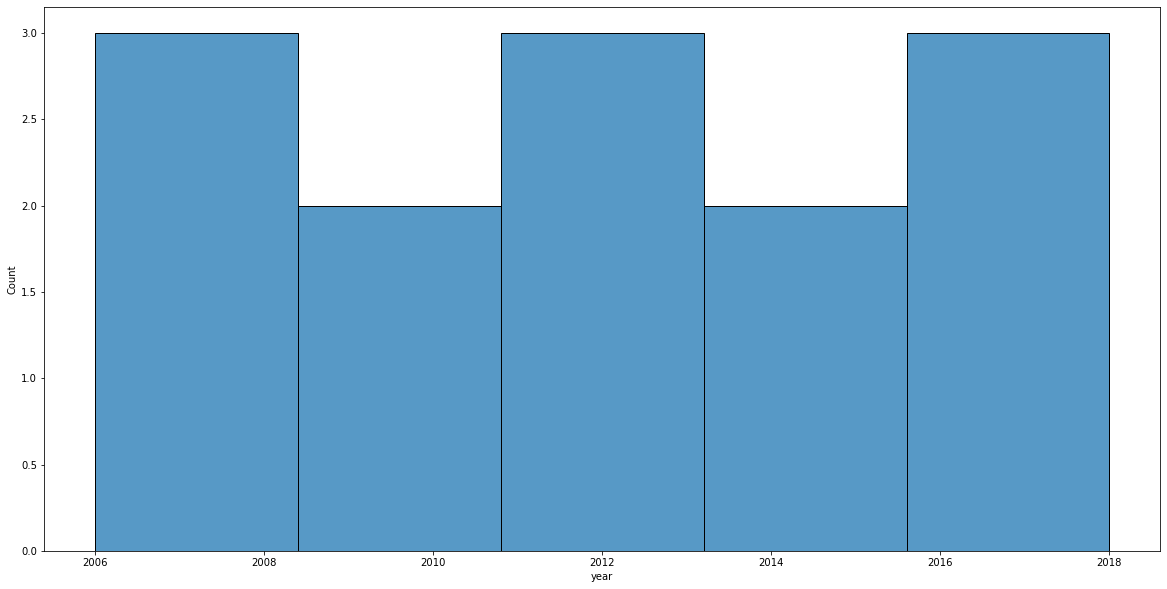

In [66]:
plt.figure(figsize= (20,10))   
sns.histplot(data= cuenta, x= 'year')
plt.show()